Consider an image from skimage.data. For simplicity, say that X ∈ R
m×n is the matrix representing
that image. You are asked to visualize the dyad of the SVD Decomposition of X and the result of compressing
the image via SVD. In particular: <br>
• Load the image into memory and compute its SVD;
• Visualize some of the dyad σiuivTi of this decomposition. What do you notice?

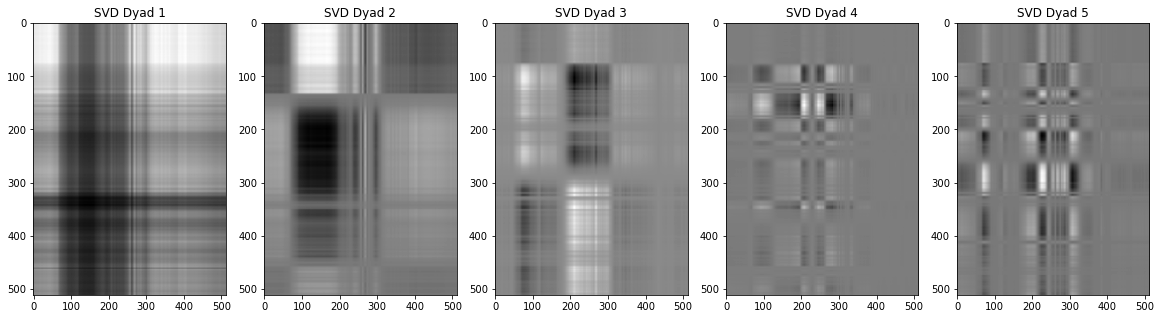

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from scipy.linalg import svd

# Load the image into memory and compute its SVD;

image = data.camera()
U, S, VT = np.linalg.svd(image, full_matrices=True)

# Visualization of some of the dyads sigma_i * u_i * v_i^T

plt.figure(figsize=(20, 5)) 

#Each dyad represents how a single singular component (σi) contributes to the approximation of the original image. 
# Dyads obtained from singular components with larger values tend to have a greater impact on the overall shape of the image.


for i in range(5):
    image_k = np.outer(U[:, i:i+1] * S[i], VT[i:i+1, :])
    plt.subplot(1, 5, i+1)
    plt.imshow(image_k, cmap='gray', aspect='auto')
    plt.title(f'SVD Dyad {i+1}')

plt.show()


• Plot the singular values of X. Do you note something?

63868.99960191935
14491.089714437125
267.13779646304965
5.119212771407103


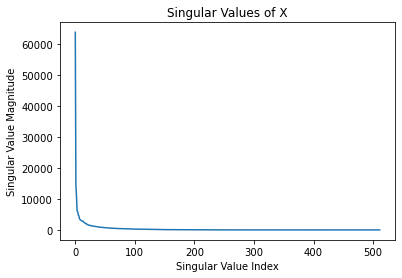

In [38]:
plt.figure()
plt.plot(S)
plt.title("Singular Values of X")
plt.xlabel("Singular Value Index")
plt.ylabel("Singular Value Magnitude")

# The first few singular values are significantly larger than the rest and they These large singular values capture 
# the most important information in the data and represent the dominant modes or structures in the image.
# There is a point in the plot where the singular values drop off very rapidly,  
# indicating that the corresponding singular vectors can be truncated without losing much information. This is the basis for dimensionality reduction using SVD.

print(S[0])
print(S[1])
print(S[100])
print(S[300])


• Visualize the k-rank approximation of X for different values of k. What do you observe?

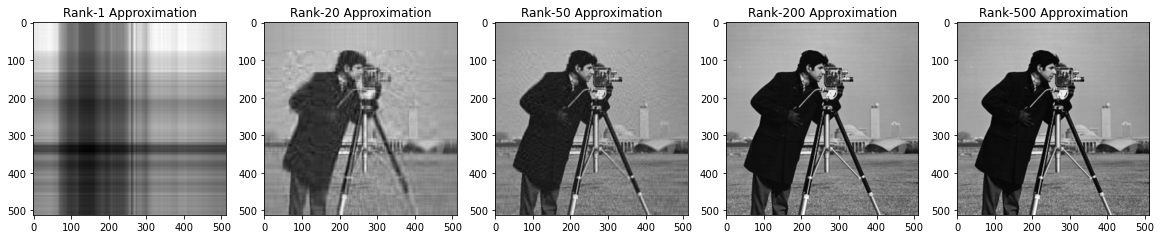

In [35]:
#Choosing an appropriate value of k depends on your specific application and the trade-off between image quality and compression.
# Higher values of k provide higher image fidelity but require more storage space and computational resources, while lower values of k lead to more aggressive compression but lower image quality.

k_values = [1, 20, 50, 200,500]
plt.figure(figsize=(20, 5))

for k in k_values:
    Image_k = (U[:, :k] @ np.diag(S[:k])) @ VT[:k, :]
    plt.subplot(1, len(k_values), k_values.index(k) + 1)
    plt.imshow(Image_k, cmap='gray')
    plt.title(f'Rank-{k} Approximation')

Compute and plot the approximation error ||X − Xk||F for increasing values of k, where Xk is the
k-rank approximation of k.

Text(0, 0.5, 'Approximation Error (Frobenius Norm)')

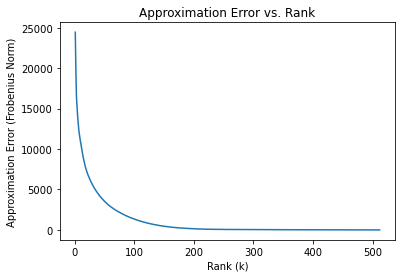

In [42]:
error_values = []
for k in range(1, len(S) + 1):
    Image_k = (U[:, :k] @ np.diag(S[:k])) @ VT[:k, :]
    error = np.linalg.norm(image - Image_k, 'fro')  
    error_values.append(error)

 # "elbow point", it indicates that increasing k beyond this point provides diminishing returns in terms of reducing the error.
 #  trade-off between approximation quality and computational resources.

plt.figure()
plt.plot(range(1, len(S) + 1), error_values)
plt.title("Approximation Error vs. Rank")
plt.xlabel("Rank (k)")
plt.ylabel("Approximation Error (Frobenius Norm)")

Plot the compression factor ck = k(m+n+1) / mn for increasing k. What is the approximation error when <br>
the compressed image requires the same amount of informations of those of the uncompressed image
(i.e. ck = 1)?

Text(0, 0.5, 'Compression Factor (c_k)')

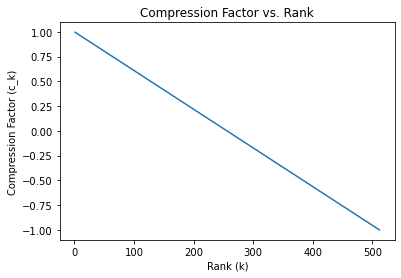

In [43]:
m, n = image.shape
compression_factors = [ 1 - (k * (m + n + 1)) / (m * n) for k in range(1, len(S) + 1)]

# When the compression factor is 1, it implies that the compression process has achieved the highest level of data reduction possible without any loss of information.
#  This is often referred to as "lossless compression," where the compressed data is an exact representation of the original data, and no information is lost in the compression process.
#It means that the compression process has achieved a lossless compression. In this scenario, the approximation error is theoretically zero because no information has been lost during the compression process.
#In mathematical terms, the approximation error ||X - Xk||F (Frobenius norm) is zero when ck = 1. This indicates that the compressed image Xk is an exact replica of the original image X, and there is no difference between them.
#In practical applications, achieving a compression factor of exactly 1 (ck = 1) can be challenging and is often related to specific data characteristics and the compression technique used. In practice, some lossless compression techniques may come very close to this ideal, resulting in extremely low approximation errors, but absolute zero error may be difficult to achieve due to factors like data encoding and precision limitations.





plt.figure()
plt.plot(range(1, len(S) + 1), compression_factors)
plt.title("Compression Factor vs. Rank")
plt.xlabel("Rank (k)")
plt.ylabel("Compression Factor (c_k)")

In [45]:
#the approximation error calculated is very close to zero, 
# then this indicates that the image_k approximation is practically identical to the original image

k = min(image.shape)  # Assuming full rank

image_k = (U[:, :k] @ np.diag(S[:k])) @ VT[:k, :]
approximation_error = np.linalg.norm(image - image_k, 'fro')

print(f"Approximation Error when ck = 1: {approximation_error}")

Approximation Error when ck = 1: 2.426340581710773e-10
